In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('loan.csv')
pd.set_option('display.max_columns', None)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


The following function will show me the top 5 rows in the dataset

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The following function will show me the last 5 rows in the dataset

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


### Columns Description

Loan_ID - Unique Loan ID

Gender - Male/ Female 

Married - Applicant married (Y/N)

Dependents - Number of dependents 

Education - Applicant Education (Graduate/ Under Graduate)

Self_Employed - Self-employed (Y/N)

ApplicantIncome - Applicant income 

CoapplicantIncome - Coapplicant income 

LoanAmount - Loan amount in thousands

Loan_Amount_Term - Term of a loan in months

Credit_History - Credit history meets guidelines

Property_Area - Urban/ Semi-Urban/ Rural

Loan_Status - Loan approved (Y/N) 

## Dataframe Atributes

### Characterisation of the data set:


Lets now visualize the data types of each column and any missing values

In [5]:
df.info

<bound method DataFrame.info of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
976  LP002971   Male     Yes         3+  Not Graduate           Yes   
977  LP002975   Male     Yes          0      Graduate            No   
978  LP002980   Male      No          0      Graduate            No   
979  LP002986   Male     Yes          0      Graduate            No   
980  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0   

I will now inspect the data types of the columns

In [6]:
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [7]:
df.dtypes.value_counts()

object     8
float64    4
int64      1
Name: count, dtype: int64

Checking the shape of the dataframe

The following function, will display the number of rows (981) and the number of columns (13)

In [8]:
print('Shape of DataFrame (Observations and Rows) = ', df.shape)

Shape of DataFrame (Observations and Rows) =  (981, 13)


In [9]:
df.shape

(981, 13)

Now I will see the column names

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
values = df.values
values

array([['LP001002', 'Male', 'No', ..., 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002980', 'Male', 'No', ..., nan, 'Semiurban', nan],
       ['LP002986', 'Male', 'Yes', ..., 1.0, 'Rural', nan],
       ['LP002989', 'Male', 'No', ..., 1.0, 'Rural', nan]], dtype=object)

## Number of distinct values in each feature

Lets now visualize the number of distinct values in each feature

In [12]:
for col in df.columns:
    print(col, ': Number of Distinct Values: ', len(df[col].unique()))

Loan_ID : Number of Distinct Values:  981
Gender : Number of Distinct Values:  3
Married : Number of Distinct Values:  3
Dependents : Number of Distinct Values:  5
Education : Number of Distinct Values:  2
Self_Employed : Number of Distinct Values:  3
ApplicantIncome : Number of Distinct Values:  752
CoapplicantIncome : Number of Distinct Values:  437
LoanAmount : Number of Distinct Values:  233
Loan_Amount_Term : Number of Distinct Values:  13
Credit_History : Number of Distinct Values:  3
Property_Area : Number of Distinct Values:  3
Loan_Status : Number of Distinct Values:  3


### Print the distinct values in each feature

In [13]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  Loan_ID :
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP0

I will now look for duplicate rows

In [14]:
df.count()

Loan_ID              981
Gender               957
Married              978
Dependents           956
Education            981
Self_Employed        926
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
Loan_Status          614
dtype: int64

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


In [16]:
df.duplicated().sum()

0

There is no duplicate data

The following function will give me a summary of statistics pertaining to the float columns and calculate the 5 number summary giving me the Mean, Standard Deviation, 1st Quartile: 25%, 3rd Quartile: 75%, Minimum: Smallest Observation in the Sample and Maximum: Largest Observation in the sample.

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [18]:
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


I will now call the .describe() function to quickly analyse the summary statistics for the numerical features.¶

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


In [20]:
print('length of data is', len(df))

length of data is 981


In [21]:
numerical_summary = df.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.000000,5179.795107,5695.104533,0.000000,2875.000000,3800.000000,5516.000000,81000.000000
CoapplicantIncome,981.000000,1601.916330,2718.772806,0.000000,0.000000,1110.000000,2365.000000,41667.000000
LoanAmount,954.000000,142.511530,77.421743,9.000000,100.000000,126.000000,162.000000,700.000000
Loan_Amount_Term,961.000000,342.201873,65.100602,6.000000,360.000000,360.000000,360.000000,480.000000
Credit_History,902.000000,0.835920,0.370553,0.000000,1.000000,1.000000,1.000000,1.000000


I will visualize how many Qualitative features are there in the dataset

In [22]:
qualitative=[feature for feature in df.columns if len(df[feature].unique())<=10]
qualitative

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [23]:
for feature in qualitative:
    print(feature)
    print(df[feature].unique())

Gender
['Male' 'Female' nan]
Married
['No' 'Yes' nan]
Dependents
['0' '1' '2' '3+' nan]
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes' nan]
Credit_History
[ 1.  0. nan]
Property_Area
['Urban' 'Rural' 'Semiurban']
Loan_Status
['Y' 'N' nan]


Lets now visualize the relationship between the qualitative features and Loan Status using a bar char

Gender


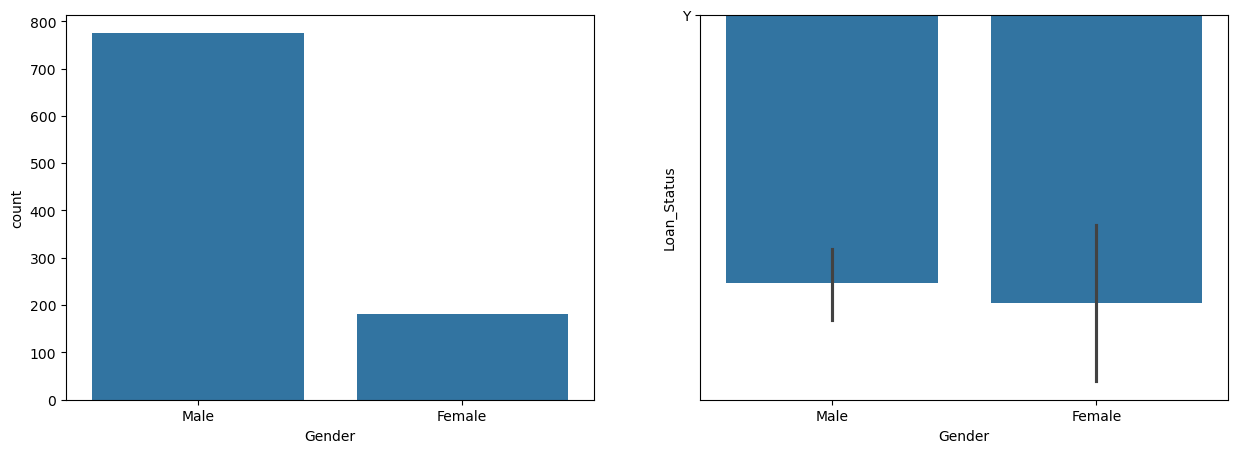

Married


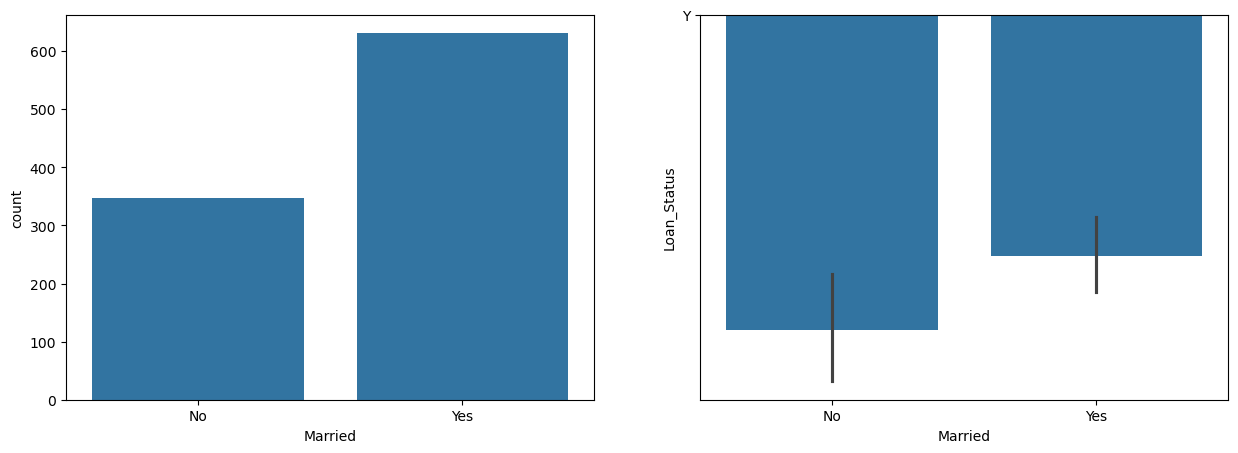

Dependents


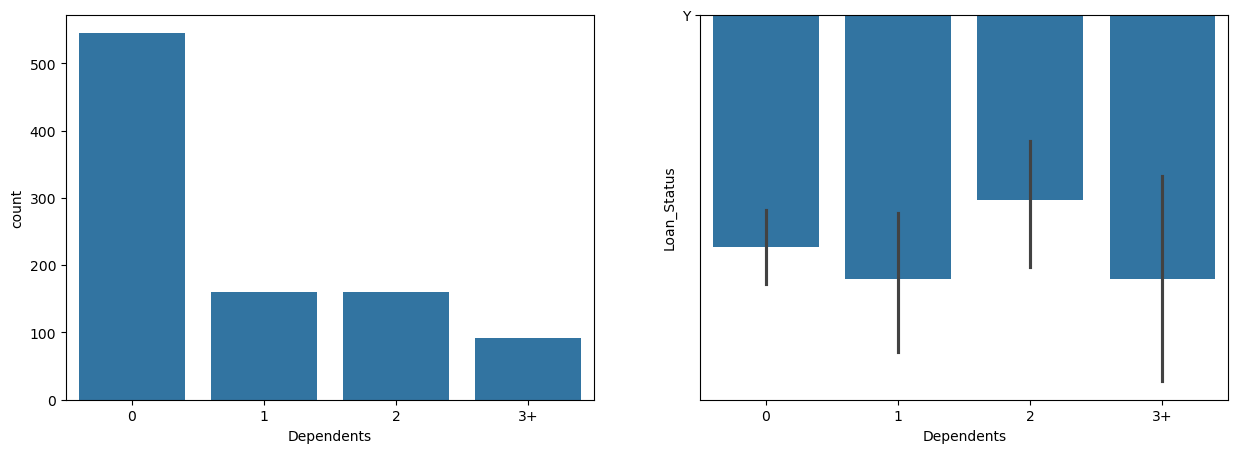

Education


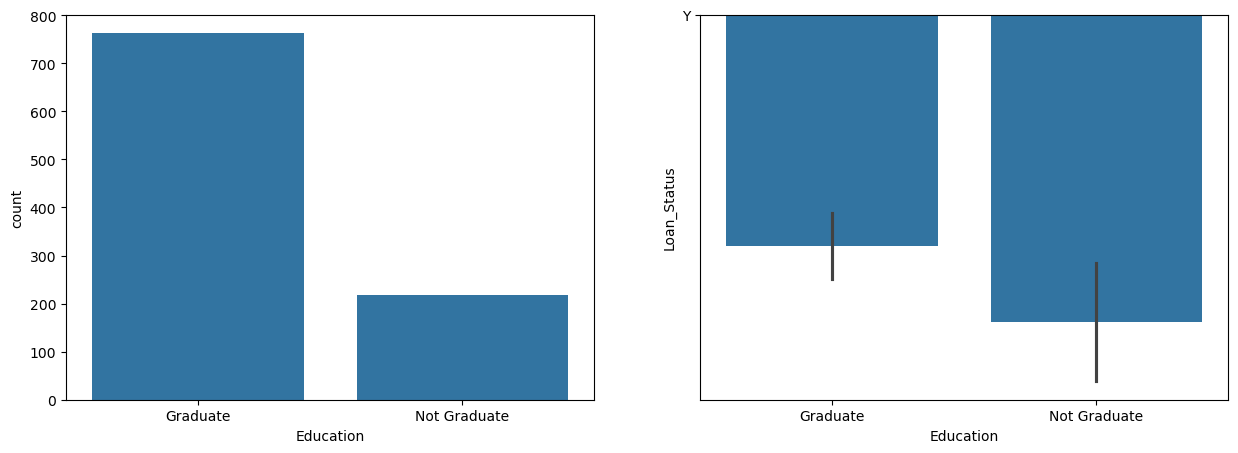

Self_Employed


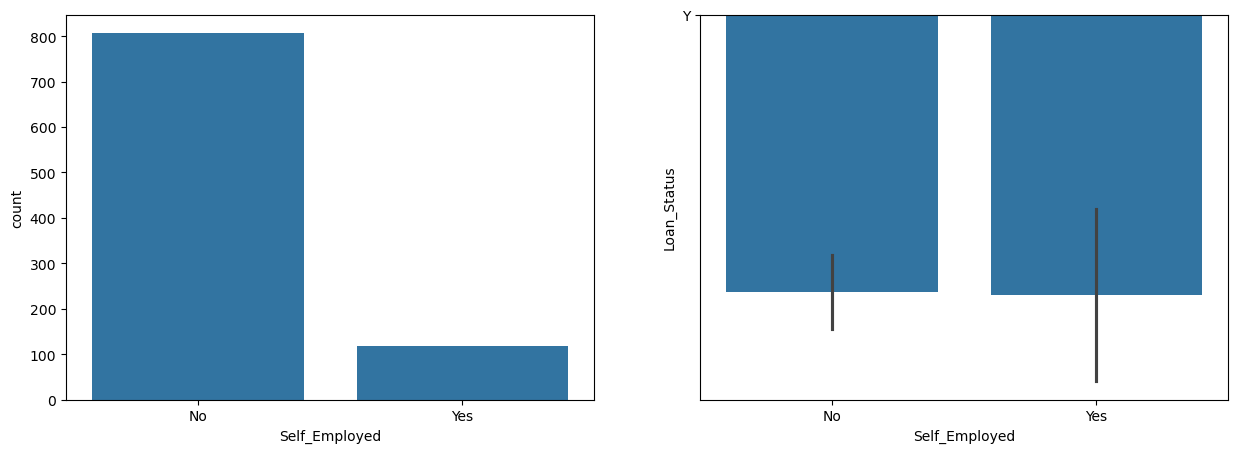

Credit_History


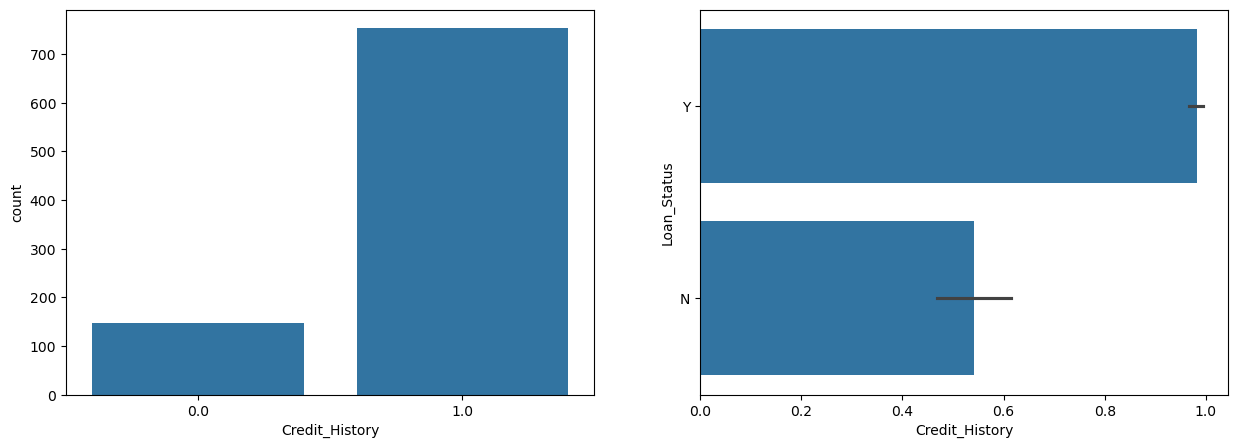

Property_Area


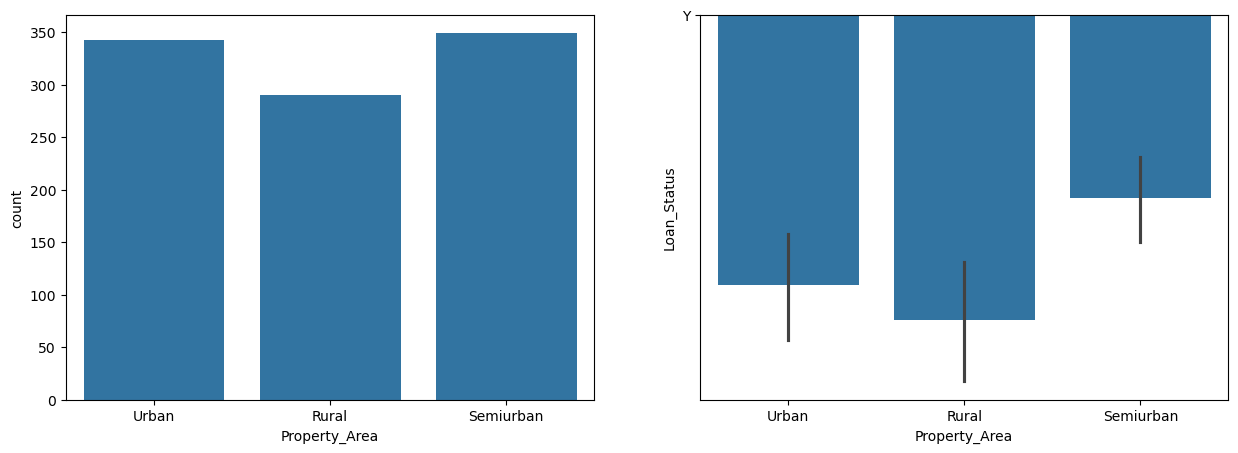

Loan_Status


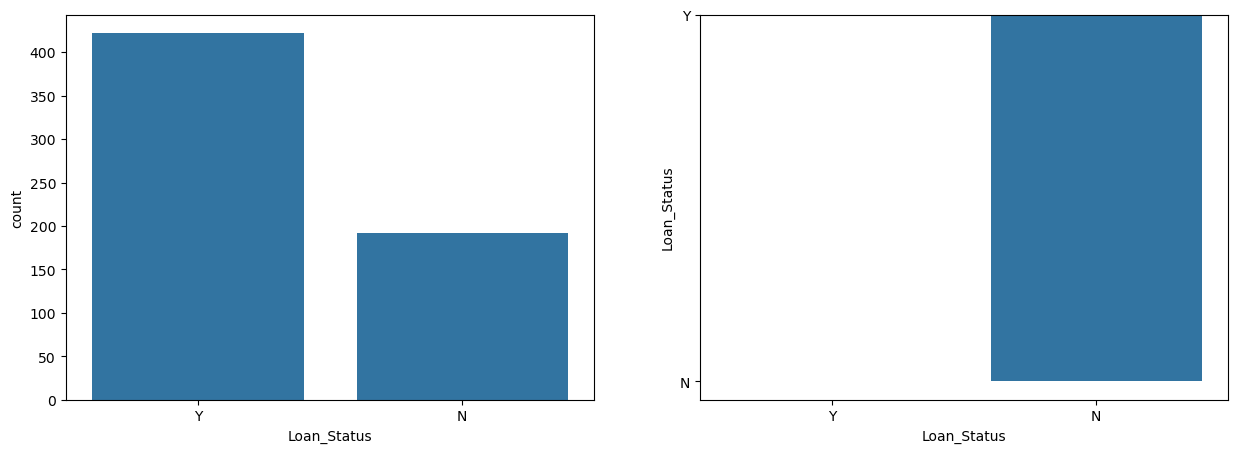

In [24]:
for feature in qualitative:
    print(feature)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature,data=df)
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature,y='Loan_Status',data=df)
    plt.show()

The following code tells me the amount of quantitative variables in the dataframe.

In [25]:
quantitative=[feature for feature in df.columns if df[feature].dtype!='O' and
             len(df[feature].unique())>10]
quantitative

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

I will now use Histogram to visualize the distribution of quantitative features by using the function count in the quantitative columns

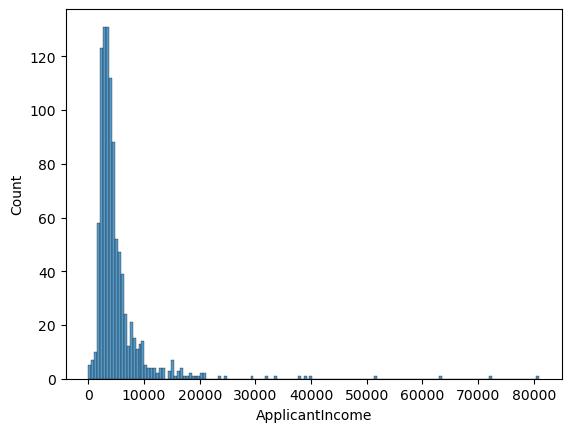

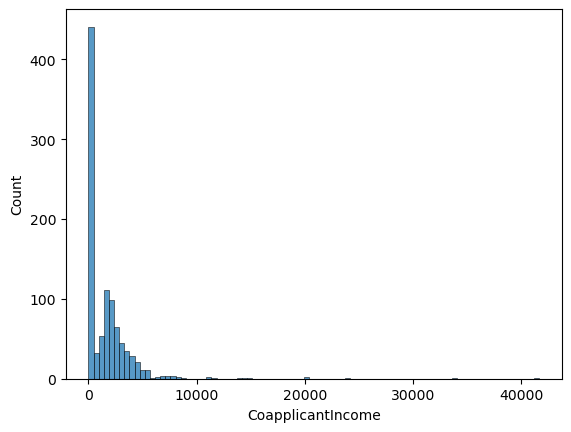

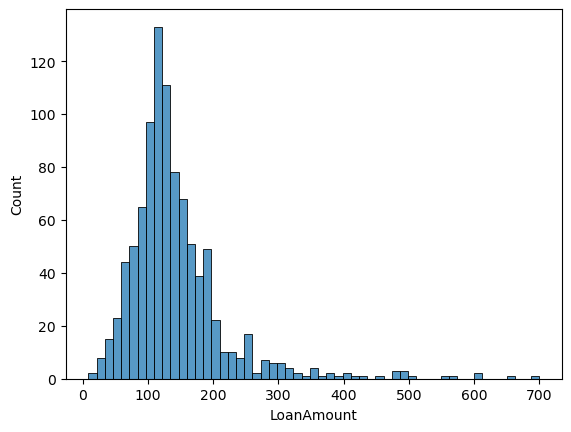

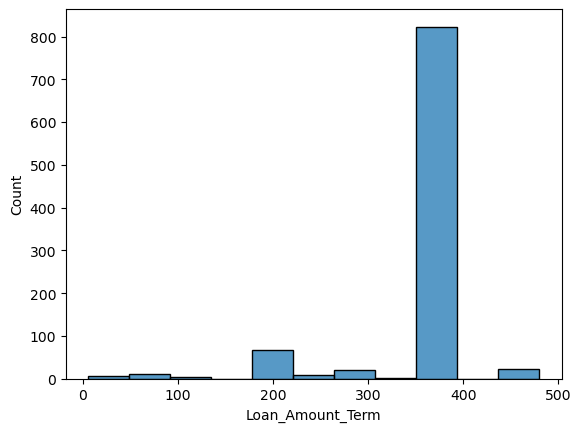

In [26]:
for feature in quantitative:
    sns.histplot(df[feature])
    plt.show()

Lets analyse the Descriptive Statistics for Numerical columns

In [27]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
print("Descriptive Statistics for Numerical Columns:")
print(df[numerical_cols].describe())

Descriptive Statistics for Numerical Columns:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


I will define categorica cols as Categorical Columns and will continue to visualize its values

In [28]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
print("\nValues for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Mode: {df[col].mode().tolist()}")


Values for Categorical Columns:

Gender:
Gender
Male      775
Female    182
Name: count, dtype: int64
Number of Unique Values: 2
Mode: ['Male']

Married:
Married
Yes    631
No     347
Name: count, dtype: int64
Number of Unique Values: 2
Mode: ['Yes']

Dependents:
Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64
Number of Unique Values: 4
Mode: ['0']

Education:
Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64
Number of Unique Values: 2
Mode: ['Graduate']

Self_Employed:
Self_Employed
No     807
Yes    119
Name: count, dtype: int64
Number of Unique Values: 2
Mode: ['No']

Property_Area:
Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64
Number of Unique Values: 3
Mode: ['Semiurban']

Loan_Status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64
Number of Unique Values: 2
Mode: ['Y']


Check the different values in each feature.

To better understand each feature, I will now use df[col].unique in order to visualize every unique value in each column

In [29]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  Loan_ID :
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP0

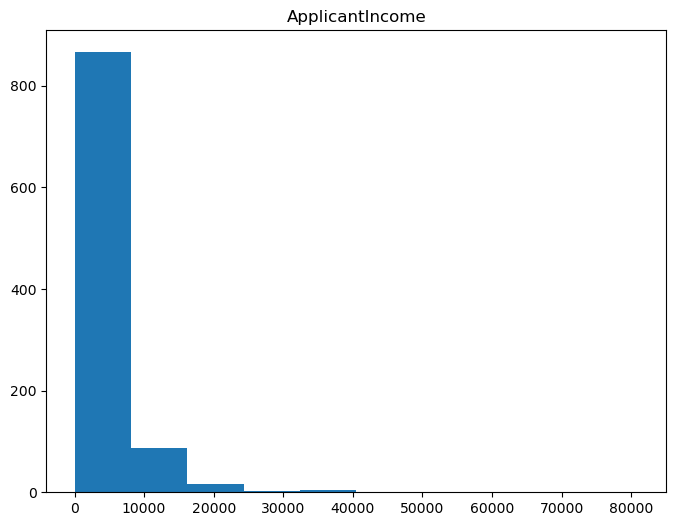

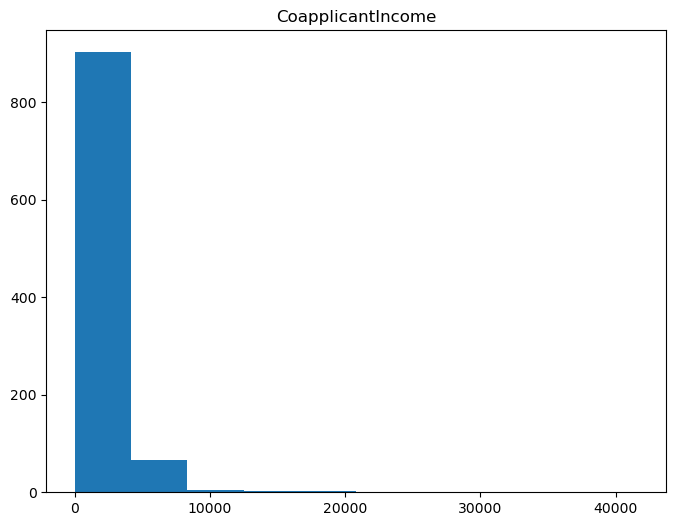

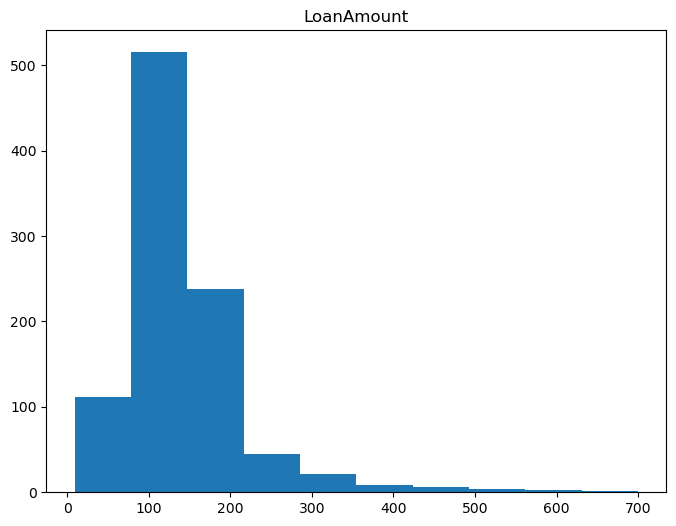

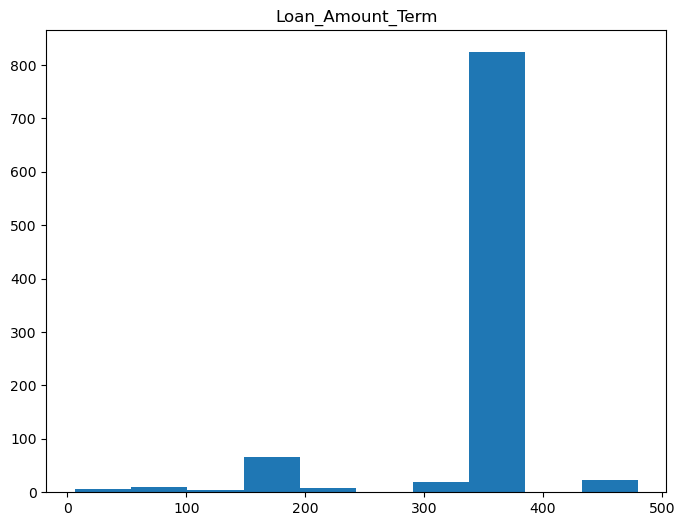

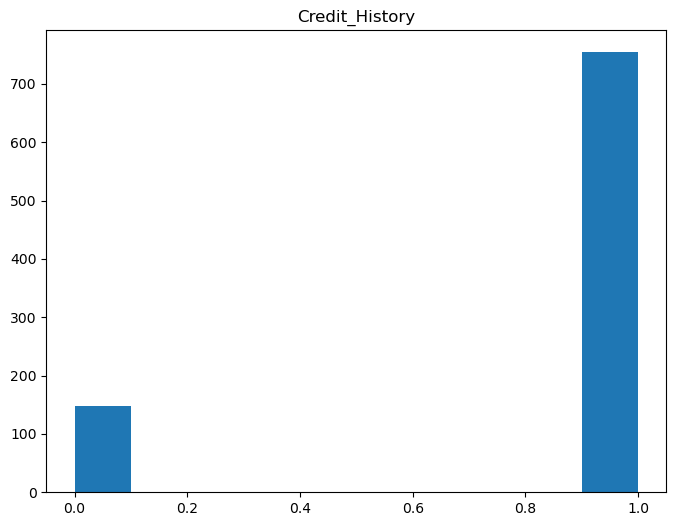

In [30]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10)
    plt.title(col)
    plt.show()

## Data Cleaning

I will now clean the new dataset to improve data consistency by standardizing and harmonizing the data making it consistent and comparable. Overall I want my data to be reliable and consistent which in turn will lead to a more robust and trustworthy insights and conclusions. I will follow this steps:

Locate any missing values

check for duplicated items

Number of missing data points per column

NaN values will be marked as True

In [31]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,False,False,False,False,False,False,False,False,False,False,False,False,True
977,False,False,False,False,False,False,False,False,False,False,False,False,True
978,False,False,False,False,False,False,False,False,False,False,True,False,True
979,False,False,False,False,False,False,False,False,False,False,False,False,True


How many missing values are there in the dataset?

In [32]:
missing_values_count = df.isnull().sum()
missing_values_count[:]

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [33]:
df.isnull().mean()*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [34]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [35]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

In [36]:
total_missing

600

In [37]:
percentage_missing = (round(df.isnull().  sum() * 100/ len(df),2).sort_values(ascending=False))
display(pd.DataFrame({'Missing Percentage' :percentage_missing}));

,Missing Percentage
Loan_Status,37.41
Credit_History,8.05
Self_Employed,5.61
LoanAmount,2.75
Dependents,2.55
Gender,2.45
Loan_Amount_Term,2.04
Married,0.31
Loan_ID,0.00
Education,0.00


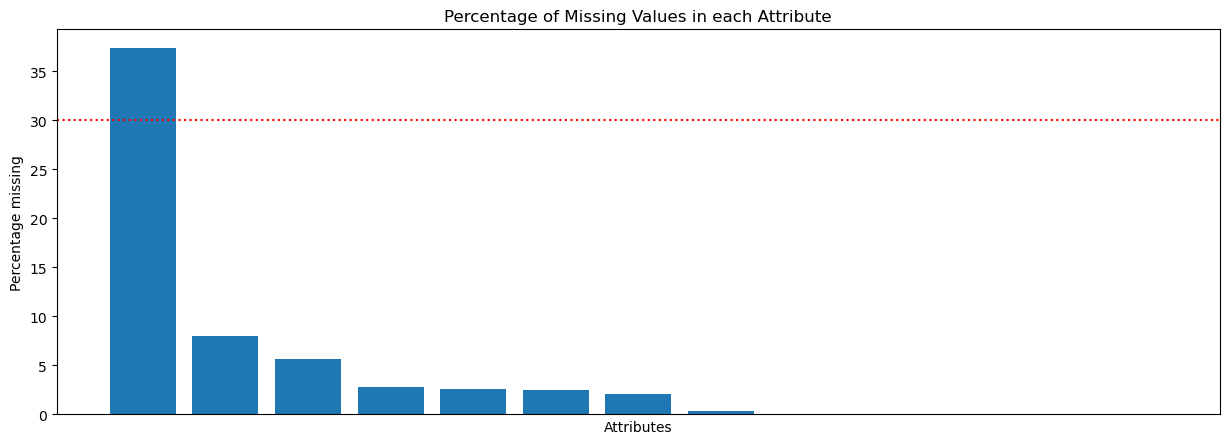

In [38]:
fig, ax = plt.subplots(figsize=(15,5))
threshold = 30

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending = False )

ax.bar(missing.index, missing.values.T[0])
plt.title("Percentage of Missing Values in each Attribute")
plt.xticks([])
plt.xlabel("Attributes")
plt.ylabel("Percentage missing")
plt.axhline(threshold, color='red', ls='dotted')
plt.show()

Lets now visualize the percentage of data missing for each feature

In [39]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
Loan_Status,367,37.410805
Credit_History,79,8.053007
Self_Employed,55,5.606524
LoanAmount,27,2.752294
Dependents,25,2.548420
Gender,24,2.446483
Loan_Amount_Term,20,2.038736
Married,3,0.305810
Loan_ID,0,0.000000
Education,0,0.000000


In [40]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [41]:
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

I will now replace missing values in quantitative data with the mean

In [42]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [43]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

I will now remove the remaining null values in Qualitative data

In [44]:
df.dropna(inplace=True)  
df.isnull().sum()   

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
df.shape

(554, 13)

We dropped 554 records

#### Dropping columns

For my specific research, the column Loan_ID has no significant value, therefore I will drop it.

In [46]:
df.drop(['Loan_ID'],inplace=True,axis=1)

In [47]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.00000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.00000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.00000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.00000,360.0,1.0,Urban,Y


### Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot.

<Axes: xlabel='ApplicantIncome'>

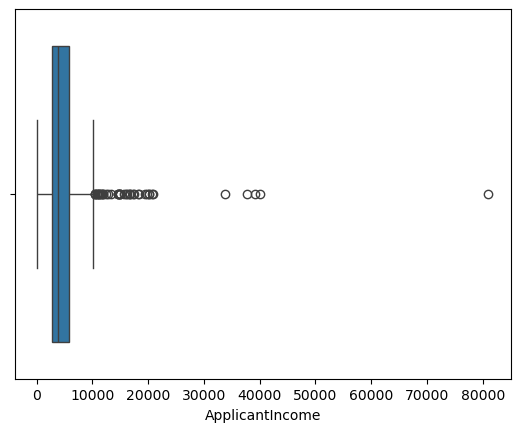

In [48]:
sns.boxplot(x=df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

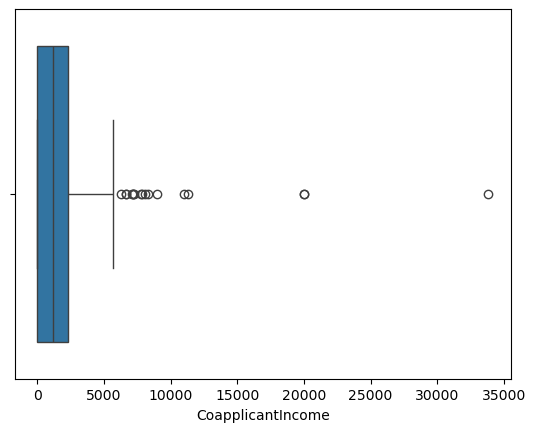

In [49]:
sns.boxplot(x=df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

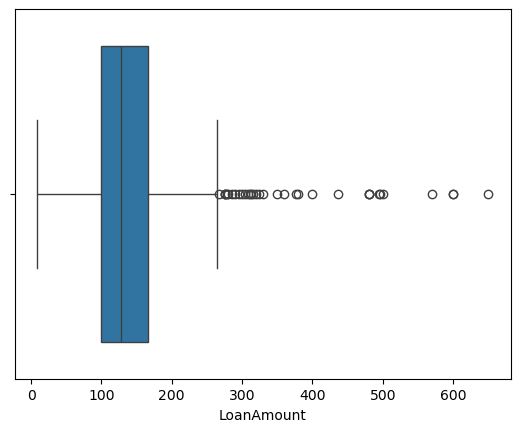

In [50]:
sns.boxplot(x=df['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term'>

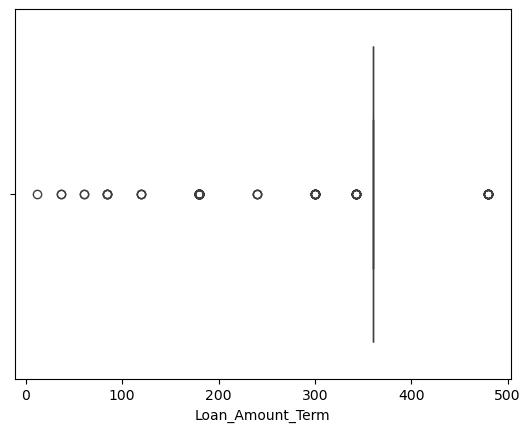

In [51]:
sns.boxplot(x=df['Loan_Amount_Term'])

### Histograms for numerical columns

The following Histograms visualize the distribution of numerical columns (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History).

kde=True adds a kernel density estimation line.

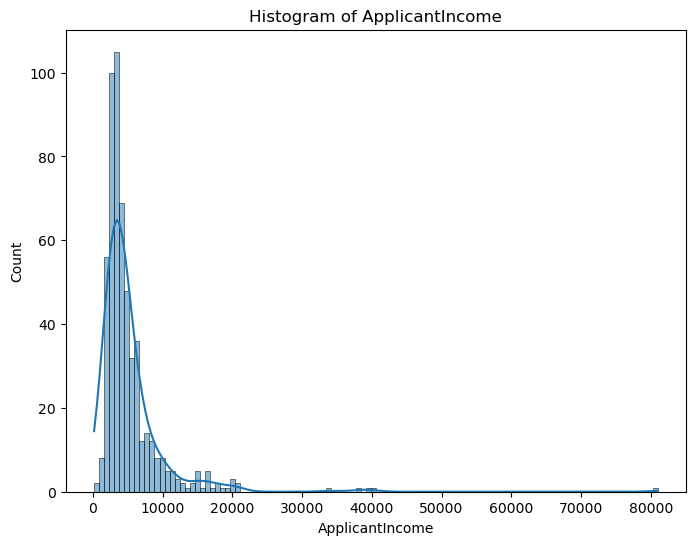

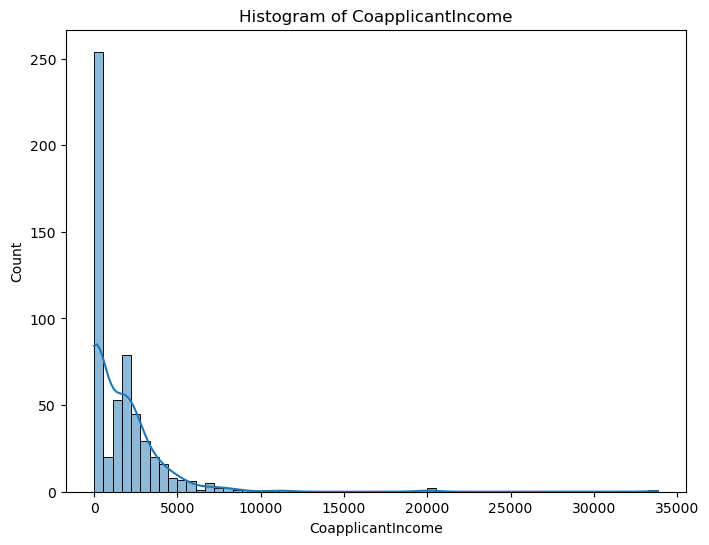

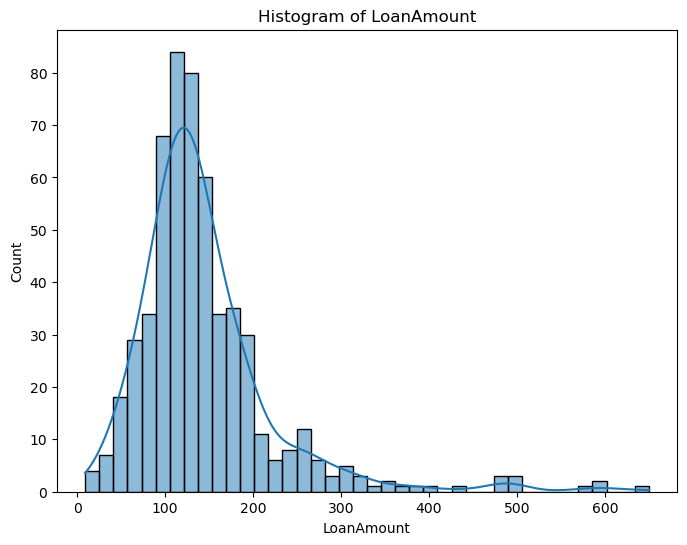

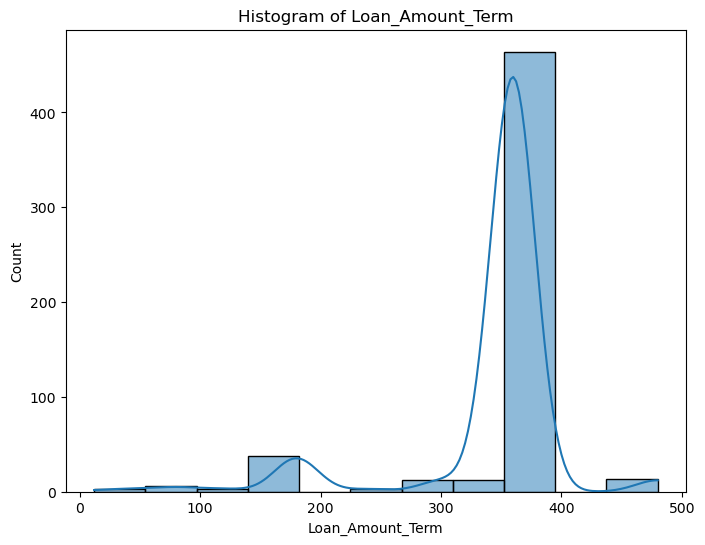

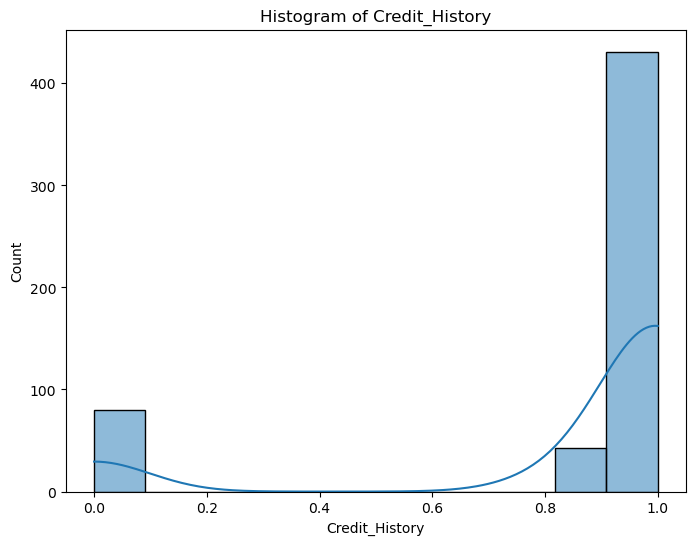

In [52]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), kde=True)  
    plt.title(f'Histogram of {col}')
    plt.show()

### Box plots for numerical columns

The following Box plots show the distribution of numerical columns, including quartiles and potential outliers.

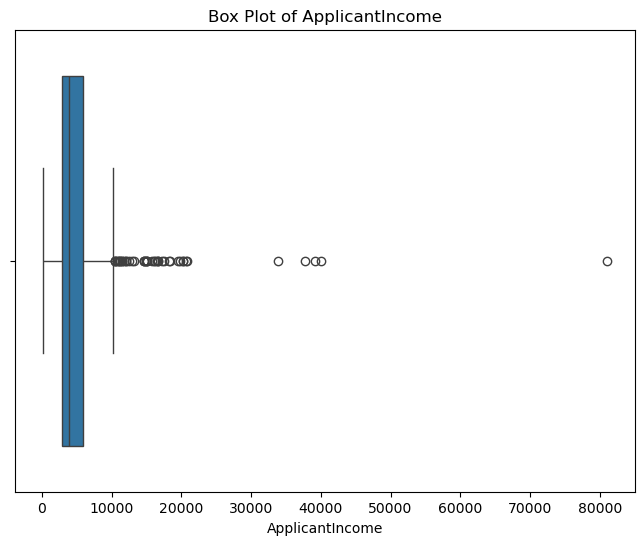

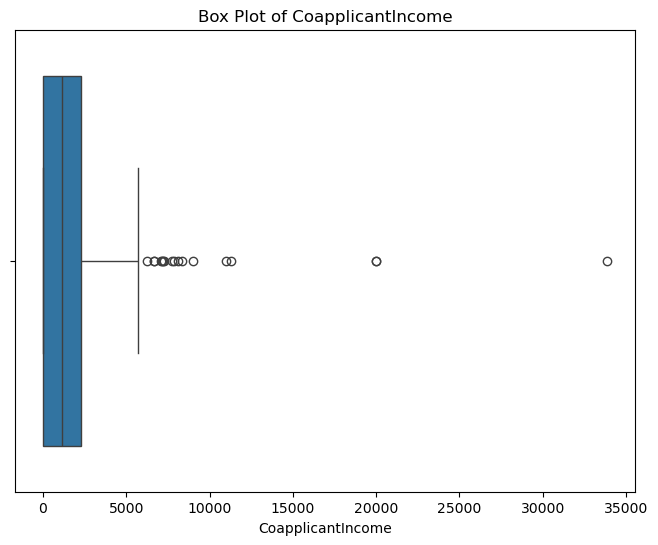

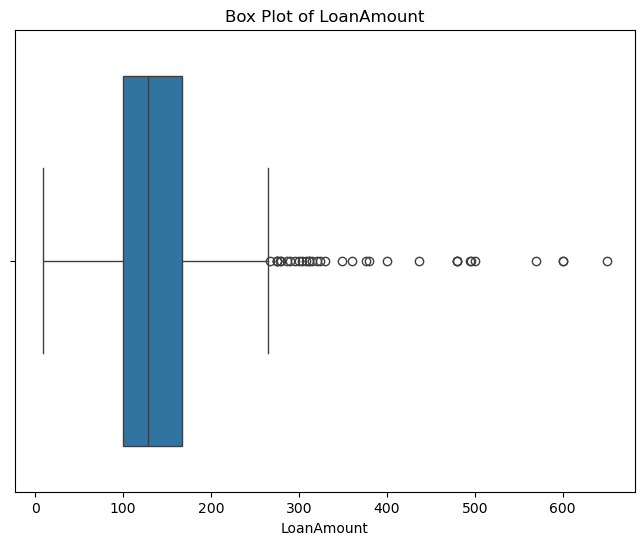

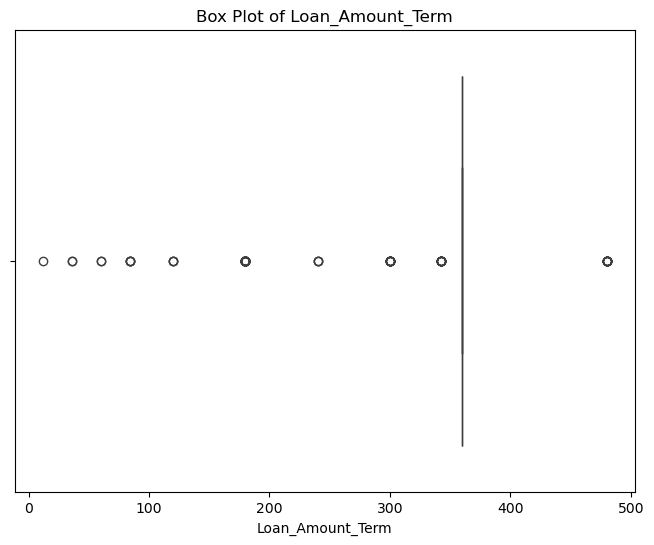

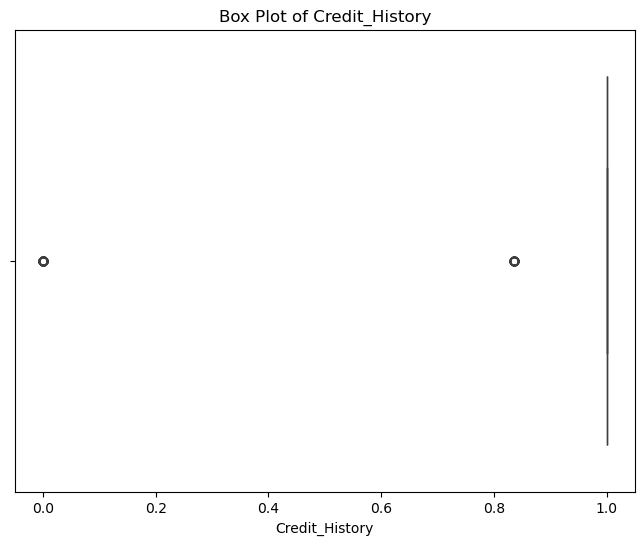

In [53]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.show()

## Visualizations

### Count plots for categorical columns

The Count plots will be used to visualize the frequency of each category in categorical columns (Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status).

This code was used for better readability: plt.xticks(rotation=45, ha='right')

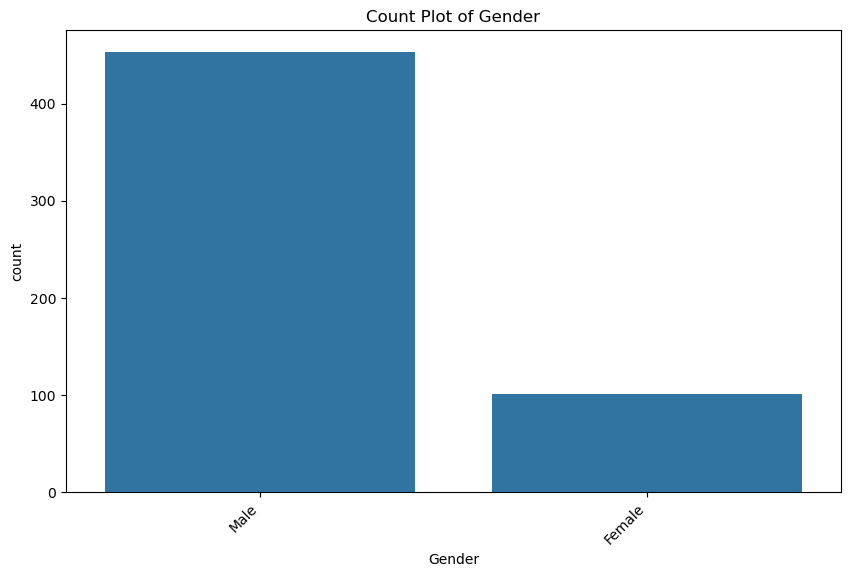

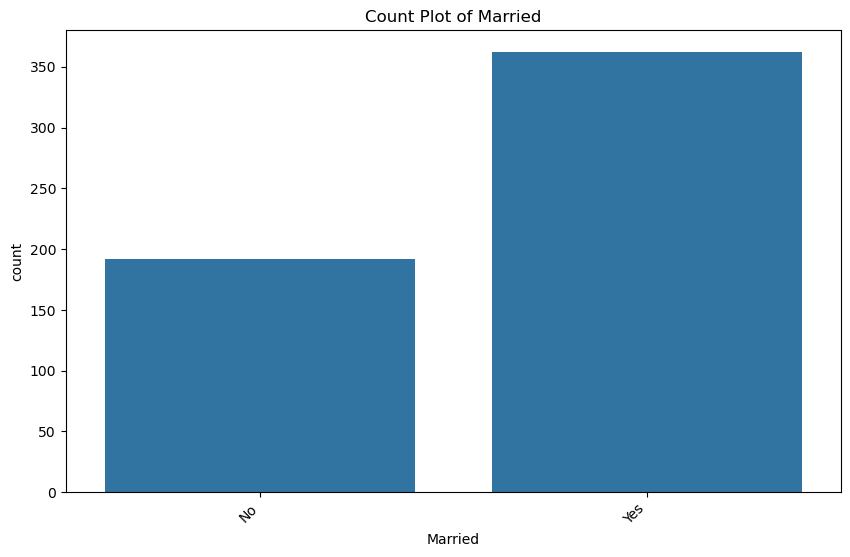

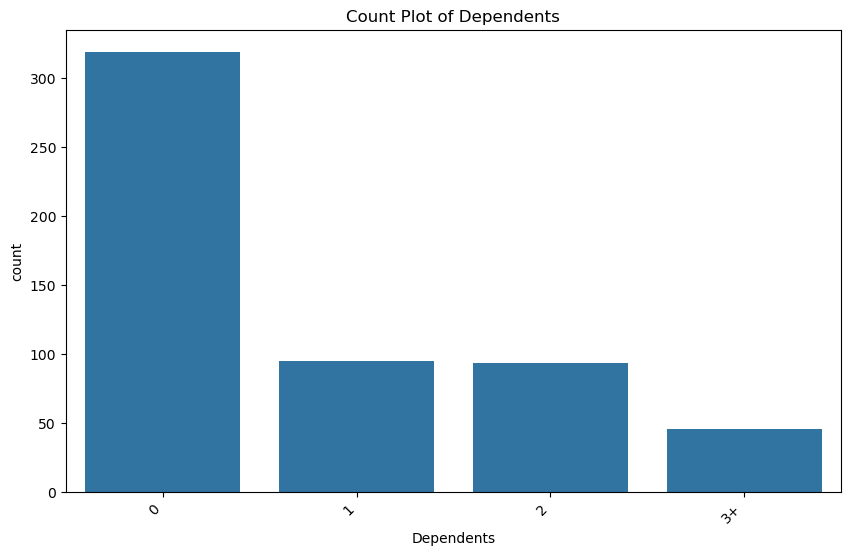

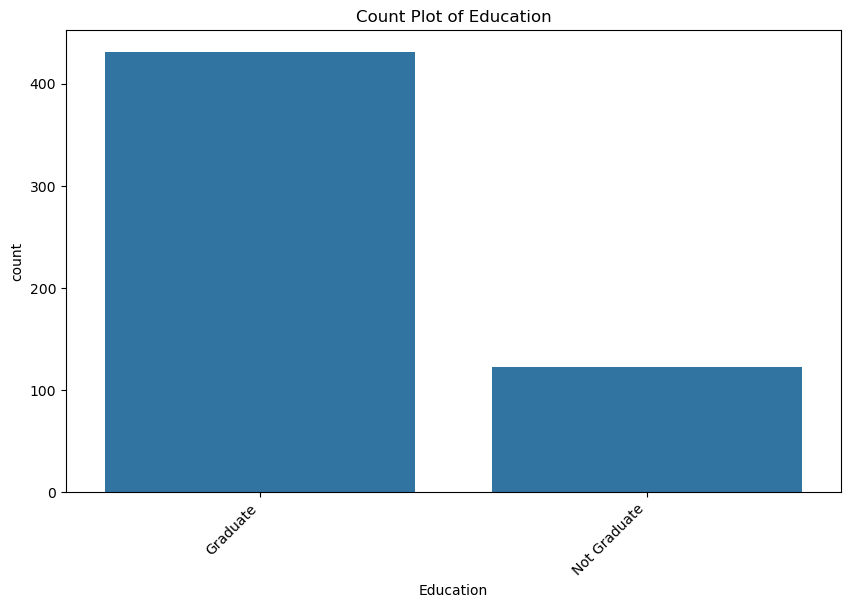

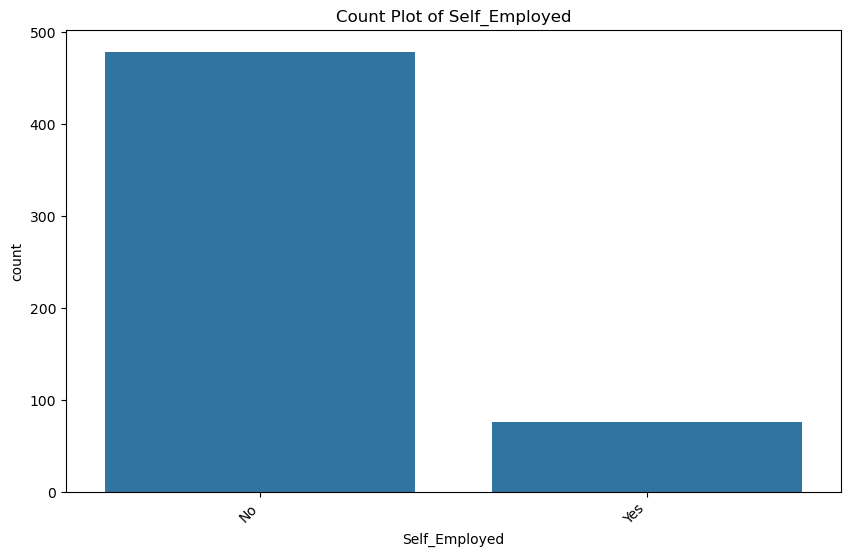

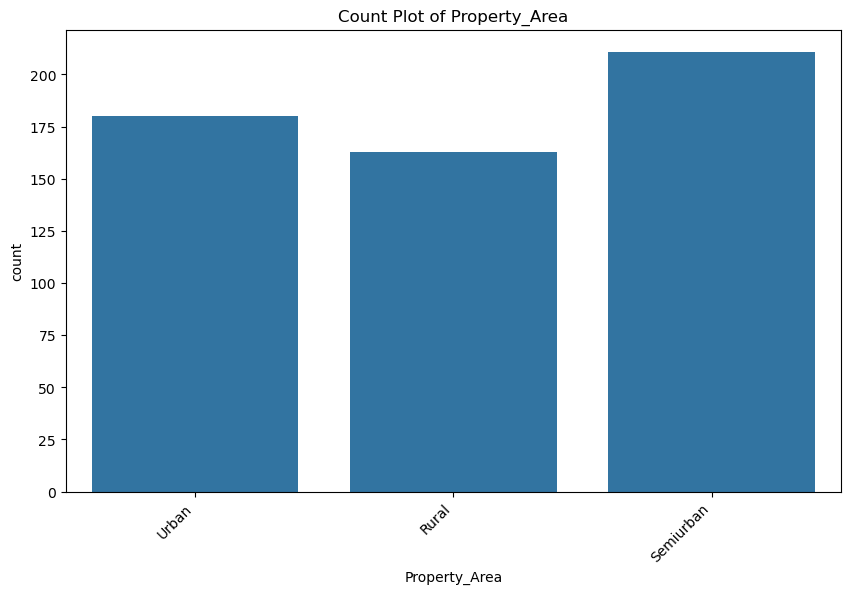

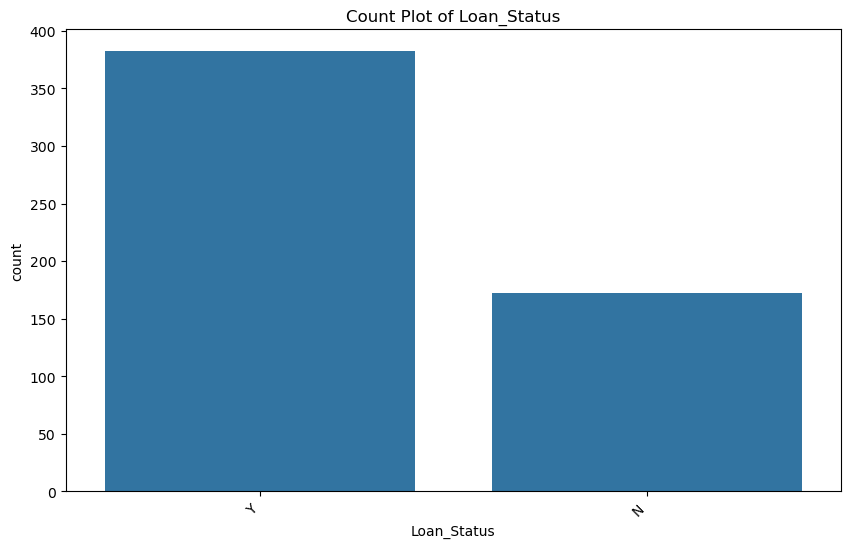

In [54]:
categorical_cols = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

### Pie Chart
The following code will generate pie charts for each of the categorical columns in the dataset, providing a clear visual representation of the distribution of different categories within each column.

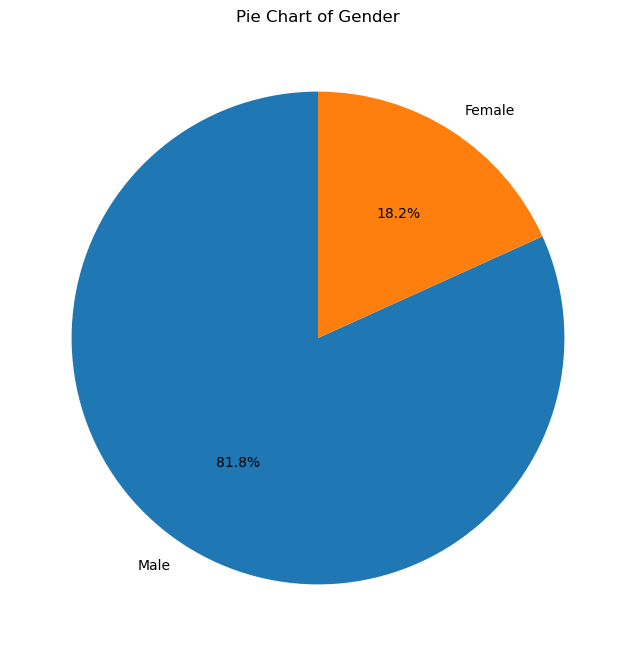

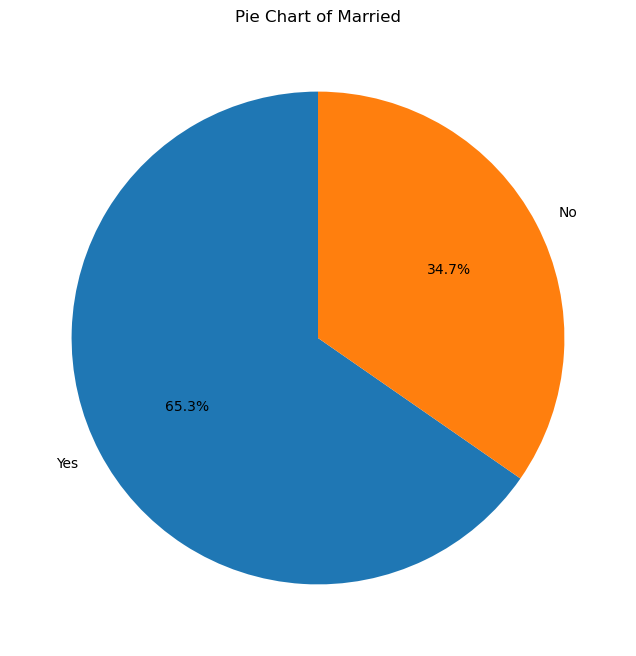

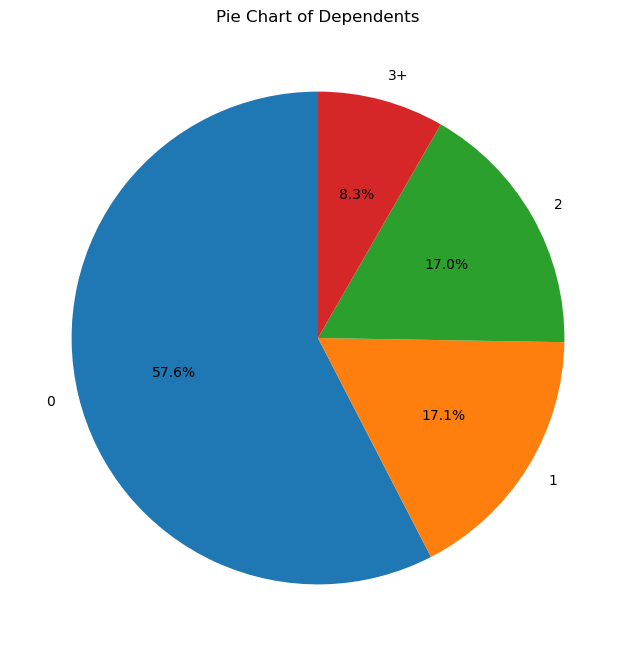

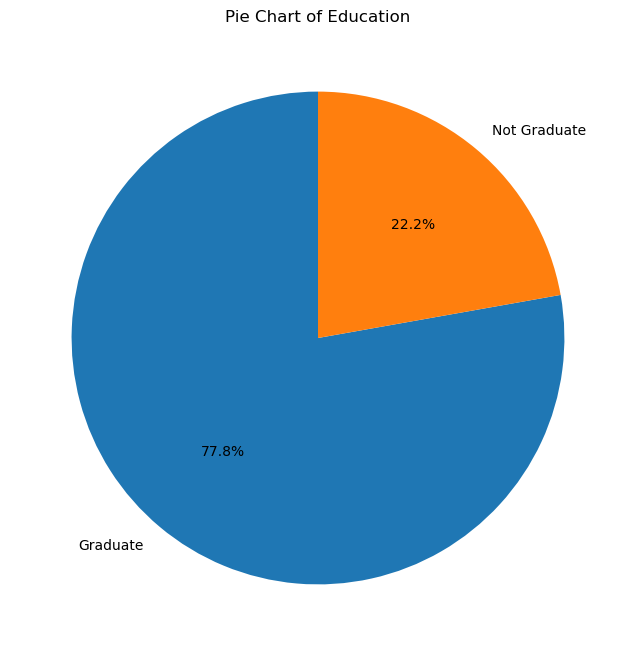

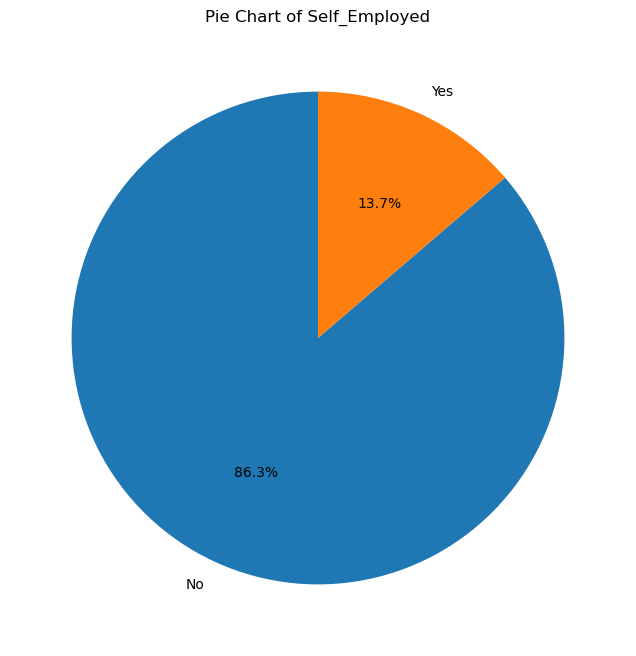

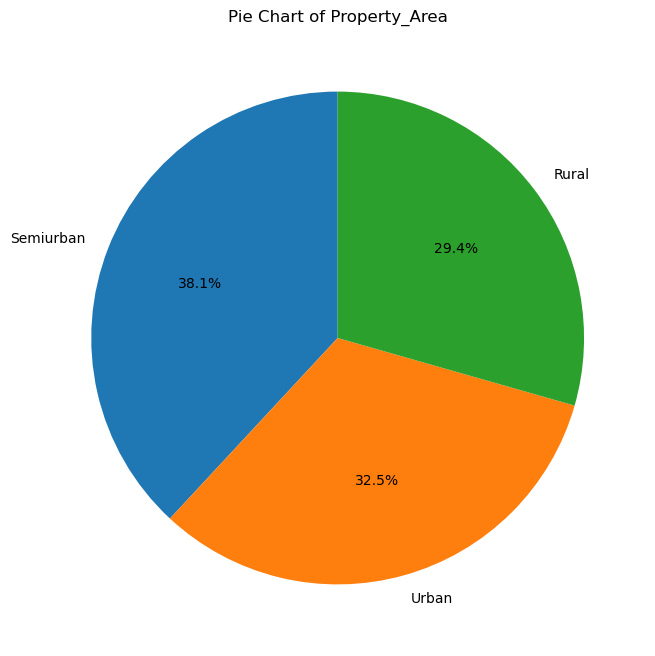

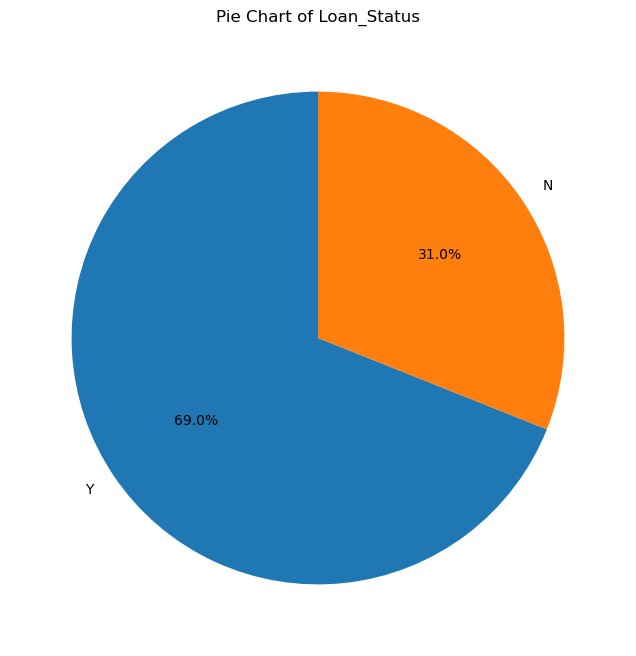

In [55]:
for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  
    plt.show()

### Distribution

We will use multiple count plots and value counts to show the categorical statuses.

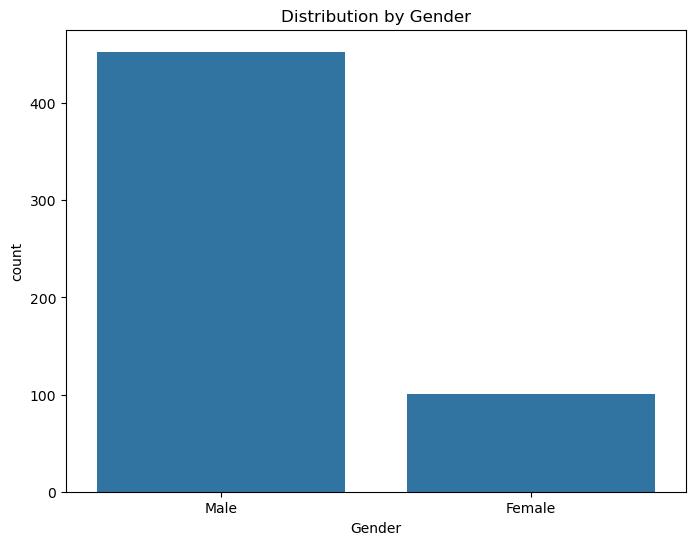

Gender
Male      453
Female    101
Name: count, dtype: int64


In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution by Gender')
plt.show()
print(df['Gender'].value_counts())

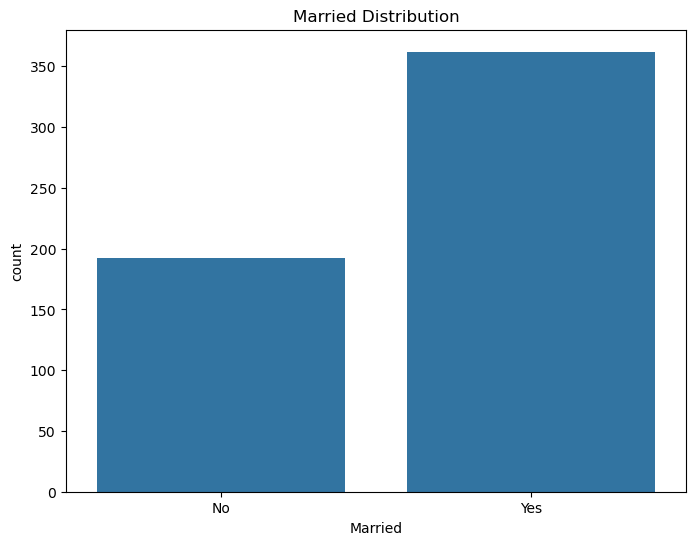

Married
Yes    362
No     192
Name: count, dtype: int64


In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', data=df)
plt.title('Married Distribution')
plt.show()
print(df['Married'].value_counts())

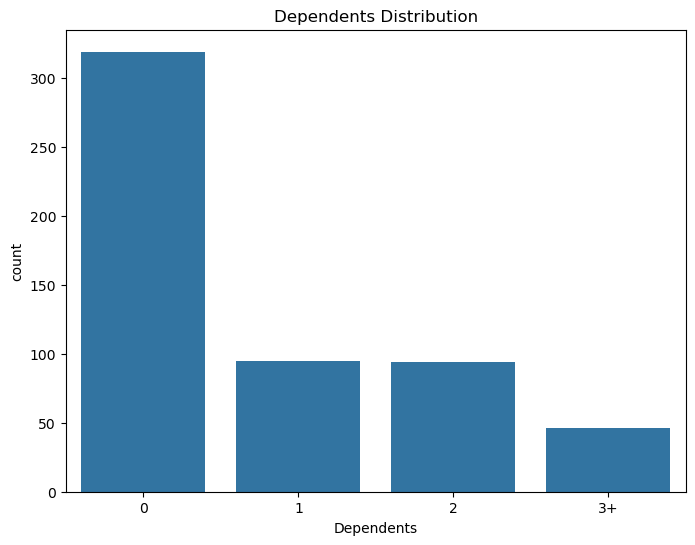

Dependents
0     319
1      95
2      94
3+     46
Name: count, dtype: int64


In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data=df)
plt.title('Dependents Distribution')
plt.show()
print(df['Dependents'].value_counts())

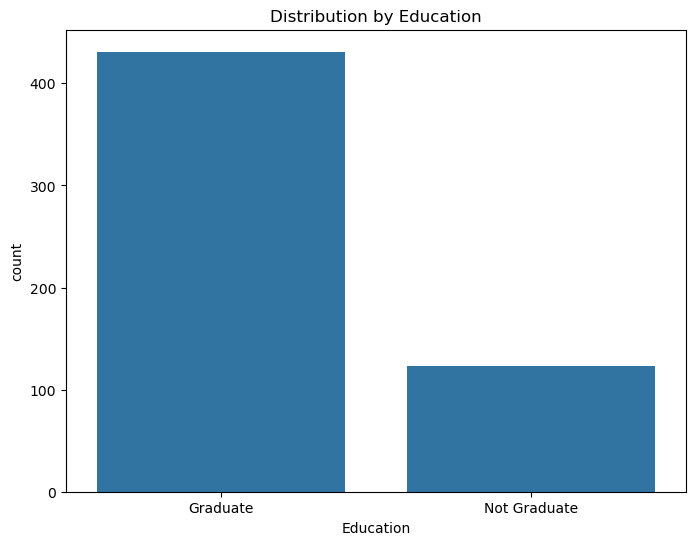

Education
Graduate        431
Not Graduate    123
Name: count, dtype: int64


In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df)
plt.title('Distribution by Education')
plt.show()
print(df['Education'].value_counts())

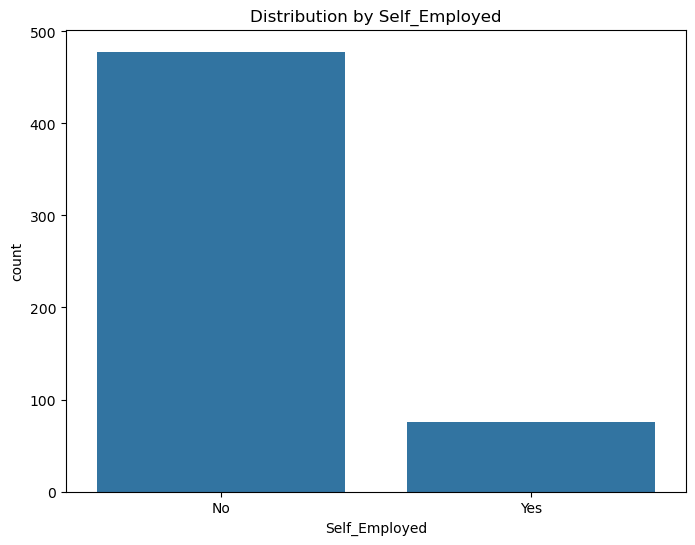

Self_Employed
No     478
Yes     76
Name: count, dtype: int64


In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', data=df)
plt.title('Distribution by Self_Employed')
plt.show()
print(df['Self_Employed'].value_counts())

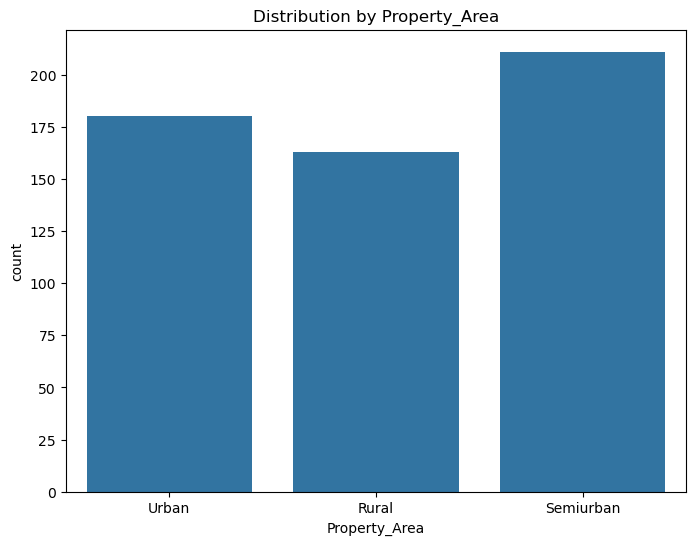

Property_Area
Semiurban    211
Urban        180
Rural        163
Name: count, dtype: int64


In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', data=df)
plt.title('Distribution by Property_Area')
plt.show()
print(df['Property_Area'].value_counts())

### Correlation Heatmap

Correlation and regression analysis are related in the sense that both deal with relationships among variables. The correlation coefficient is a measure of linear association between two variables. The values of the correlation coefficient are always between -1 and +1. A correlation coefficient of +1 indicates that two variables are perfectly related in a positive linear sense, a correlation coefficient of -1 indicates that two variables are perfectly related in a negative linear sense, and a correlation coefficient of 0 indicates that there is no linear relationship between the two variables.

In [62]:
correlation = df[numerical_cols].corr(method='pearson')
columns = correlation.nlargest(10, 'LoanAmount').index
columns

Index(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

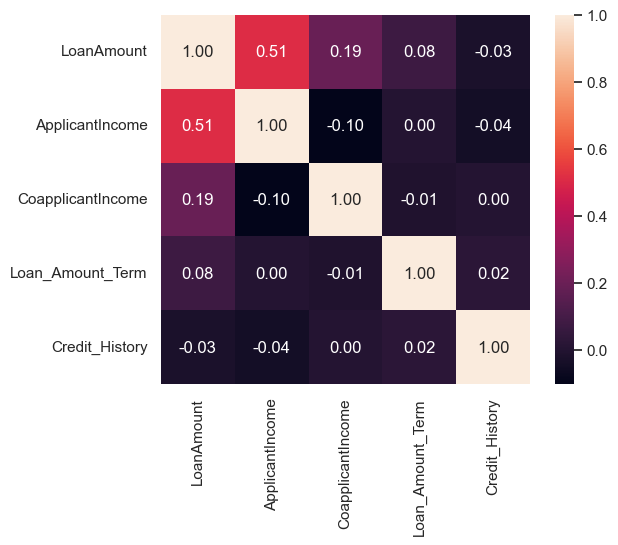

In [63]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

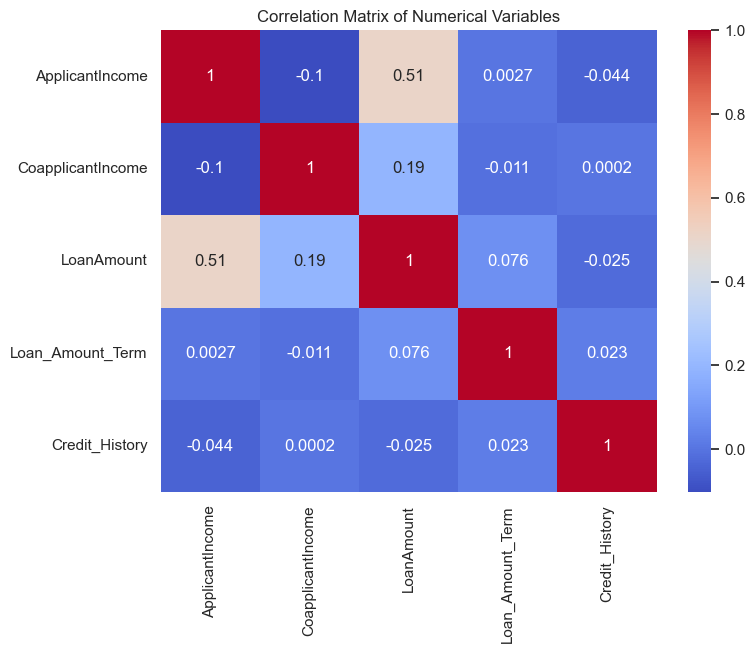

In [64]:
numerical_cols = ['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [65]:
df[numerical_cols].corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.103279,0.510931,0.002656,-0.043859
CoapplicantIncome,-0.103279,1.000000,0.193697,-0.010913,0.000195
LoanAmount,0.510931,0.193697,1.000000,0.075516,-0.025214
Loan_Amount_Term,0.002656,-0.010913,0.075516,1.000000,0.023059
Credit_History,-0.043859,0.000195,-0.025214,0.023059,1.000000


### Scatter Plot

The following scatter plot shows the relationship between Loan Status and ApplicantIncome.

Scatter Plot: Relationship between ApplicantIncome & Status')

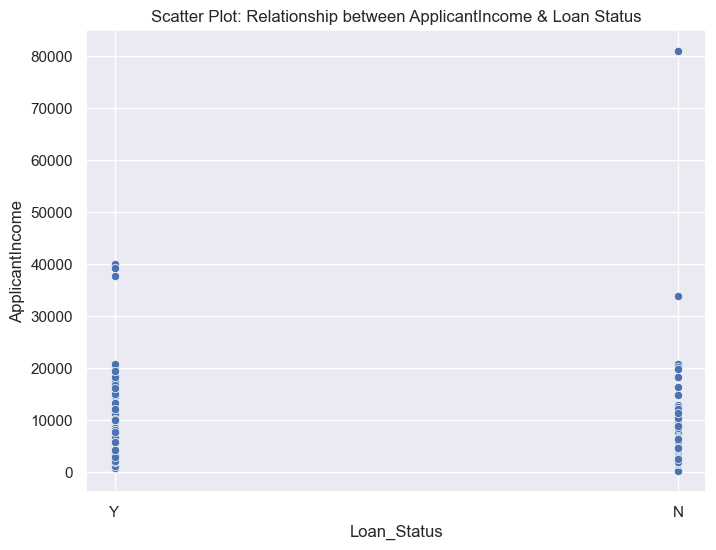

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Scatter Plot: Relationship between ApplicantIncome & Loan Status')
plt.show()

<Axes: xlabel='Loan_Status'>

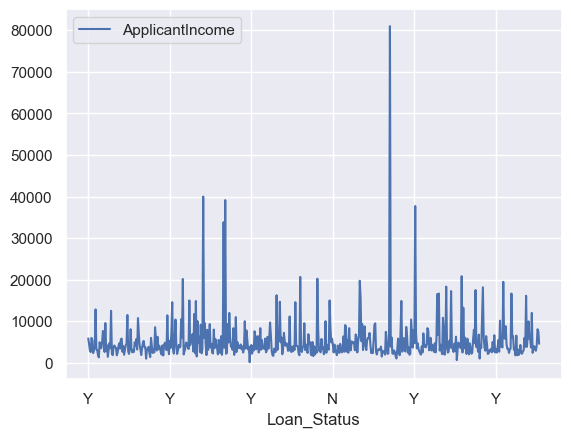

In [67]:
df.plot(x="Loan_Status",y="ApplicantIncome")

Scatter Plot: Relationship between CoapplicantIncome & Loan Status')

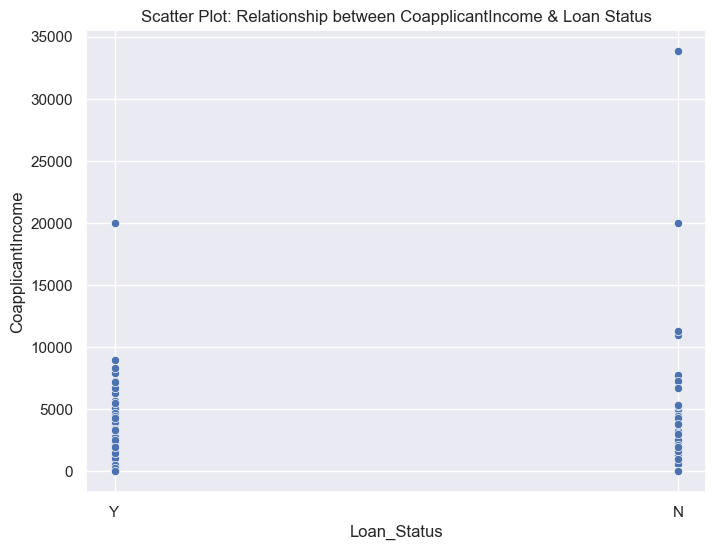

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Scatter Plot: Relationship between CoapplicantIncome & Loan Status')
plt.show()

<Axes: xlabel='Loan_Status'>

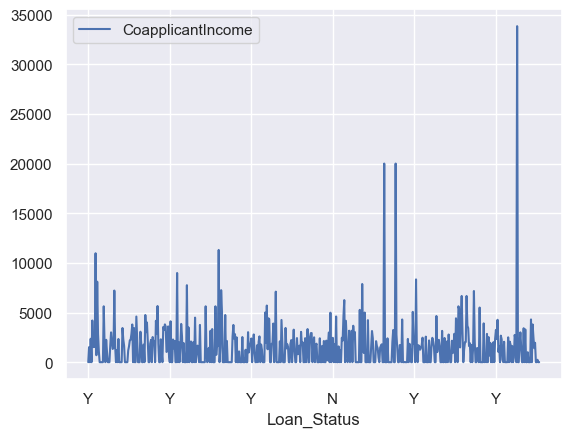

In [69]:
df.plot(x="Loan_Status",y="CoapplicantIncome")

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

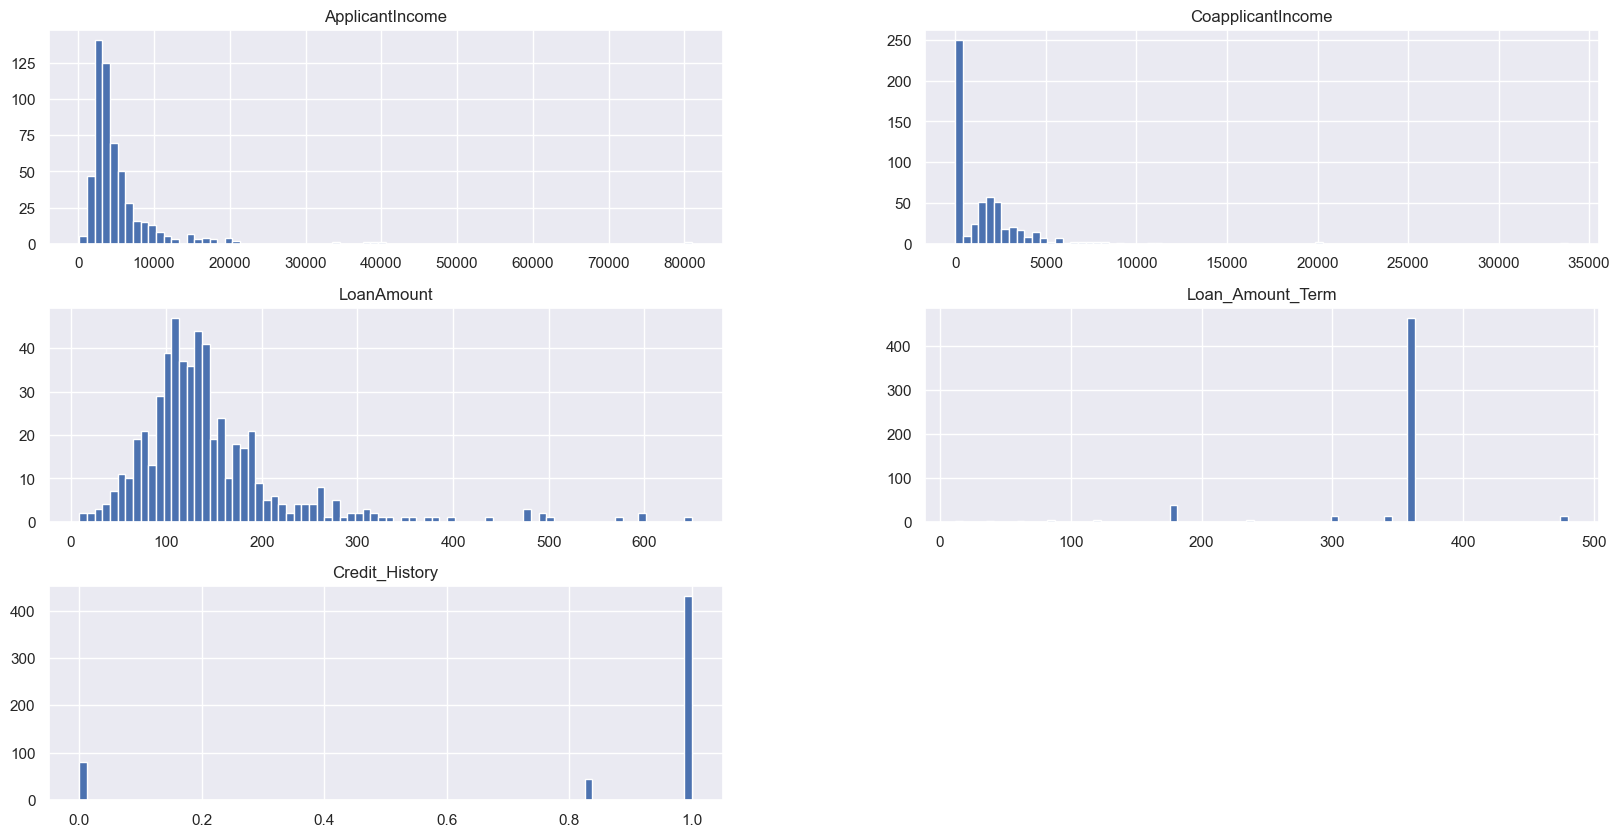

In [70]:
df.hist(bins=80, figsize=(20,10))

In [71]:
groups = df.groupby('Loan_Status')

for key, item in groups:
    print(groups.get_group(key), "\n\n")

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1      Male     Yes          1      Graduate            No             4583   
7      Male     Yes         3+      Graduate            No             3036   
9      Male     Yes          1      Graduate            No            12841   
13     Male      No          0      Graduate            No             1853   
17   Female      No          0      Graduate            No             3510   
..      ...     ...        ...           ...           ...              ...   
589    Male     Yes          2      Graduate           Yes             2726   
591    Male     Yes          2      Graduate           Yes             6000   
596    Male     Yes          2  Not Graduate           Yes             6383   
605    Male     Yes          0  Not Graduate            No             2400   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

### One hot encoding:

one hot encoding is process which is used to convert categorical features into numerical features by converting catageries into integers by creating a new column with a 1 or 0

In [72]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.00000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.00000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.00000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.00000,360.0,1.0,Urban,Y


One-Hot Encoding will handle_unknown='ignore' and deal with unseen categories.

In [73]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,142.51153,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.00000,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.00000,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.00000,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.00000,360.0,1.0,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.00000,360.0,1.0,False,False,False,False,False,False,False,False,False,True
610,4106,0.0,40.00000,180.0,1.0,True,True,False,False,True,False,False,False,False,True
611,8072,240.0,253.00000,360.0,1.0,True,True,True,False,False,False,False,False,True,True
612,7583,0.0,187.00000,360.0,1.0,True,True,False,True,False,False,False,False,True,True


I will now convert boolean columns to integers (True=1, False=0)

In [74]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


I will now see if are there any NaN values in my dataset

In [75]:
print(df['Loan_Status_Y'].isnull().sum())


0


I will remove rows with Nan values in Loan_Status_Y

In [76]:
#df.dropna(subset=['Loan_Status_Y'], inplace=True)


I will now prepare features (X) and target (y)

In [77]:
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Data Split

Split the dataset into training and testing sets (e.g., 80% train, 20% test).

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Logistic Regression Model

Logistic regression is a statistical method used primarily for binary classification, where the goal is to predict the probability of an outcome that can be in one of two categories. It extends the idea of linear regression but is particularly well-suited for scenarios where the target variable is categorical, like "yes" or "no" and "spam" or "not spam." 

Logistic regression applies a logistic (sigmoid) function to squeeze the output between 0 and 1. This makes it ideal for producing probabilities for class membership, where values closer to 0 represent one class, and those closer to 1 represent the other. The model calculates an odds ratio, which represents the likelihood of a certain class occurring as compared to the alternative, and this probability is then mapped to the sigmoid function for a final prediction.

In logistic regression, training the model involves finding the optimal coefficients that minimize a cost function, often using maximum likelihood estimation. The cost function measures how far the predicted probabilities are from the actual labels, and gradient descent is commonly used to adjust the weights iteratively to improve prediction accuracy. 

Additionally, the algorithm is widely valued for its simplicity and interpretability, as each coefficient provides insight into the relationship between a feature and the likelihood of a specific outcome, which makes it especially useful in fields like medicine, finance, and social sciences.

I will now train logistic regression model using the training data

In [81]:
model = LogisticRegression()

model.fit(X_train, y_train)

print("Model training completed successfully!")

Model training completed successfully!


I will now make predictions on test set

In [82]:
y_pred = model.predict(X_test)

I will now compare test set predictions. A confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions, giving a more detailed view of the model's performance for each class.

In [83]:
print("Accuracy:", accuracy_score(y_pred, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8378378378378378
Confusion Matrix:
 [[15 17]
 [ 1 78]]
Precision: 0.8210526315789474
Recall: 0.9873417721518988


Model Evaluation

In [84]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [90]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

     Actual  Predicted
89        1          1
87        1          1
289       1          1
512       1          1
182       1          1
..      ...        ...
96        1          1
607       1          1
168       0          0
195       0          1
537       1          1

[111 rows x 2 columns]


In [91]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.sample(60)

,Actual,Predicted
26,1,1
448,0,0
97,1,1
561,1,1
490,1,1
203,1,1
307,0,0
79,1,1
598,1,1
420,1,1


In [92]:
print(X_train)

[[-0.4387074  -0.0101402  -0.67692859 ... -0.39874279 -0.78432159
   1.44144989]
 [-0.14679352 -0.62864652 -0.30658535 ... -0.39874279 -0.78432159
  -0.69374594]
 [ 0.43905249 -0.62864652 -0.50410175 ... -0.39874279 -0.78432159
   1.44144989]
 ...
 [ 0.29502208 -0.62864652  0.68099661 ... -0.39874279  1.27498722
  -0.69374594]
 [ 1.02122895 -0.62864652  1.10071895 ... -0.39874279  1.27498722
  -0.69374594]
 [ 0.40070554 -0.62864652 -0.02868558 ...  2.50788231  1.27498722
  -0.69374594]]


In [93]:
print(X_test)

[[ 0.07851776  1.02347901  0.37237725 ... -0.39874279  1.27498722
  -0.69374594]
 [-0.50769521  0.21109475 -0.50410175 ... -0.39874279  1.27498722
  -0.69374594]
 [ 0.77812028 -0.62864652  0.52051454 ... -0.39874279 -0.78432159
  -0.69374594]
 ...
 [-0.55594999 -0.62864652 -1.0102375  ... -0.39874279  1.27498722
  -0.69374594]
 [-0.39302132  0.39545721  0.31065338 ... -0.39874279  1.27498722
  -0.69374594]
 [-0.30275002 -0.62864652 -0.46706742 ... -0.39874279  1.27498722
  -0.69374594]]


In [94]:
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 0.8378
Confusion Matrix:
[[15 17]
 [ 1 78]]


#### Findings:
The model accuracy is 0.8378, which signifies that 83.78% of all predictions were correct and the model is quite good, and the model correctly predicts loan approval or rejection 83.78% of the time.

#### Loan Not Approved

Results:
15 True Negatives, which means that correctly predicted (Loan Not Approved)

17 False Positives, which means that incorrectly predicted as (Loan Approved) when it should not be.

#### Loan Approved

Results:
78 True Positives, meaning that the model correctly predicted (Loan Approved).

1 False Negative, which means that the model incorrectly predicted (Loan Not Approved) when it should have been approved.
